In [2]:
# Install Libraries
!pip install textblob


In [14]:
# Import Libraries

from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
import re
import string
import csv

from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


In [33]:
keyword = "Tokyo 2020 summer olympics"
import collections

In [15]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
rows = []
header = []


with open("tweetdata.csv", encoding="utf-8") as csvfile:
    csvReader = csv.reader(csvfile)
    header = next(csvReader)
    for row in csvReader:
        rows.append(row[0])

noOfTweet = len(rows)

count = 1

for tweet in rows:
    
    print(f"\rReading {count}/{noOfTweet} tweet", end=" ")
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
        
    count += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Reading 10004/10004 tweet                                       

In [16]:
#Number of Tweets (Total, Positive, Negative, Neutral)
print("\rGetting dataset...      ")
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

Getting dataset...      
total number:  10004
positive number:  4848
negative number:  1932
neutral number:  3224


In [17]:
tweet_list

,0
0,There are concerns this afternoon a Brisbane b...
1,everyone crosses a line while aldo trying to c...
2,@OGesports Monkas OLYMPICs GAYS
3,i am not the same person i was before i heard ...
4,#NSTsports Peng Soon can now dream of qualifyi...
...,...
9999,"@PoliBard Janes a professional whinger,a perma..."
10000,"None of these. Hyper Olympic, or Track and Fie..."
10001,"@Jorno_arts @GameApologist lol, what the hell?..."
10002,Australia....needs to wake the fuck up and get...


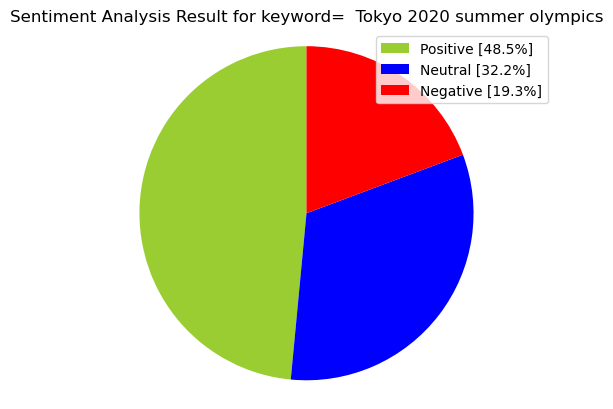

In [20]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [21]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [22]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,There are concerns this afternoon a Brisbane b...,There are concerns this afternoon a Brisbane b...
1,everyone crosses a line while aldo trying to c...,everyone crosses a line while aldo trying to c...
2,@OGesports Monkas OLYMPICs GAYS,@OGesports Monkas OLYMPICs GAYS
3,i am not the same person i was before i heard ...,i am not the same person i was before i heard ...
4,#NSTsports Peng Soon can now dream of qualifyi...,#NSTsports Peng Soon can now dream of qualifyi...
...,...,...
9999,"@PoliBard Janes a professional whinger,a perma...","@PoliBard Janes a professional whinger,a perma..."
10000,"None of these. Hyper Olympic, or Track and Fie...","None of these. Hyper Olympic, or Track and Fie..."
10001,"@Jorno_arts @GameApologist lol, what the hell?...","@Jorno_arts @GameApologist lol, what the hell?..."
10002,Australia....needs to wake the fuck up and get...,Australia....needs to wake the fuck up and get...


In [23]:
tweet_list

,0,text
0,There are concerns this afternoon a Brisbane b...,There are concerns this afternoon a Brisbane b...
1,everyone crosses a line while aldo trying to c...,everyone crosses a line while aldo trying to c...
2,@OGesports Monkas OLYMPICs GAYS,@OGesports Monkas OLYMPICs GAYS
3,i am not the same person i was before i heard ...,i am not the same person i was before i heard ...
4,#NSTsports Peng Soon can now dream of qualifyi...,#NSTsports Peng Soon can now dream of qualifyi...
...,...,...
9999,"@PoliBard Janes a professional whinger,a perma...","@PoliBard Janes a professional whinger,a perma..."
10000,"None of these. Hyper Olympic, or Track and Fie...","None of these. Hyper Olympic, or Track and Fie..."
10001,"@Jorno_arts @GameApologist lol, what the hell?...","@Jorno_arts @GameApologist lol, what the hell?..."
10002,Australia....needs to wake the fuck up and get...,Australia....needs to wake the fuck up and get...


In [24]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,There are concerns this afternoon a Brisbane b...,there are concerns this afternoon a brisbane b...
1,everyone crosses a line while aldo trying to c...,everyone crosses a line while aldo trying to c...
2,@OGesports Monkas OLYMPICs GAYS,monkas olympics gays
3,i am not the same person i was before i heard ...,i am not the same person i was before i heard ...
4,#NSTsports Peng Soon can now dream of qualifyi...,nstsports peng soon can now dream of qualifyi...
5,I hope more &amp; more people come forward wit...,i hope more amp more people come forward wit...
6,There's even Helsinki Olympic stadium w 36k DA...,there s even helsinki olympic stadium w 36k da...
7,@9thanchen Wooooooow! Thank you for sharing th...,wooooooow thank you for sharing thos angle ...
8,"Whistler home to #Whistler #Blackcomb, one of ...",whistler home to whistler blackcomb one of ...
9,@DikgangDk @MpNkophe @mandla20 @iDiskiTimes We...,we aren t good based on the very simpl...


In [31]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,There are concerns this afternoon a Brisbane b...,there are concerns this afternoon a brisbane b...,-0.125000,0.375000,negative,0.112,0.888,0.000,-0.5267
1,everyone crosses a line while aldo trying to c...,everyone crosses a line while aldo trying to c...,0.000000,0.125000,neutral,0.000,1.000,0.000,0.0000
2,@OGesports Monkas OLYMPICs GAYS,monkas olympics gays,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,i am not the same person i was before i heard ...,i am not the same person i was before i heard ...,-0.007576,0.264583,neutral,0.000,1.000,0.000,0.0000
4,#NSTsports Peng Soon can now dream of qualifyi...,nstsports peng soon can now dream of qualifyi...,0.650000,0.700000,positive,0.000,0.926,0.074,0.2500
5,I hope more &amp; more people come forward wit...,i hope more amp more people come forward wit...,0.282143,0.539286,positive,0.000,0.697,0.303,0.8834
6,There's even Helsinki Olympic stadium w 36k DA...,there s even helsinki olympic stadium w 36k da...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,@9thanchen Wooooooow! Thank you for sharing th...,wooooooow thank you for sharing thos angle ...,0.000000,0.000000,positive,0.083,0.717,0.200,0.4767
8,"Whistler home to #Whistler #Blackcomb, one of ...",whistler home to whistler blackcomb one of ...,0.100000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,@DikgangDk @MpNkophe @mandla20 @iDiskiTimes We...,we aren t good based on the very simpl...,-0.019643,0.411565,negative,0.141,0.744,0.115,-0.0767


In [ ]:
with open('datas.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(map(lambda x: [x], tw_list))

In [58]:
tw_list.to_csv('datas.csv')

In [ ]:
out.writerows(map(lambda x: [x], fin_ids))

In [26]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [27]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [28]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,4911,49.77
neutral,3012,30.52
negative,1945,19.71
